In [11]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as pl

from seaborn import set_style, pairplot
set_style("whitegrid")

In [17]:
data_path = './data_raw/epl_data_10-21/df_full_premierleague.csv'
epl = pd.read_csv(data_path,index_col=0)
epl = epl.loc[epl['season']=='18/19']
epl.reset_index(drop=True,inplace=True)
epl.rename(columns={'goal_home_ft':'home_goals','goal_away_ft':'away_goals'},inplace=True)


xg_data = pd.read_csv('./data_raw/england-premier-league-matches-2018-to-2019-stats.csv')
## renaming the columns to match them with epl data
xg_data.rename(columns={'home_team_name':'home_team','away_team_name':'away_team'},inplace=True)

## One of the team is written differently accross two datasets. Making it uniform.
xg_data.replace(to_replace='Brighton & Hove Albion',value='Brighton and Hove Albion',inplace=True)

## merging XG data from xg_data to epl data
xg_data2 = xg_data[['home_team','away_team','team_a_xg','team_b_xg']]
data = pd.merge(epl,xg_data2,on=['home_team','away_team'])

data.rename(columns={'team_a_xg':'home_xg','team_b_xg':'away_xg'},inplace=True)

In [18]:
# checking that merge is done right
teams = epl['home_team'].unique()
for i,home_team in enumerate(teams):
    for away_team in teams[i+1:]:
        h_poss1 = data.loc[(data['home_team']==home_team) * (data['away_team']==away_team)]['home_possession']
        a_poss1 = data.loc[(data['home_team']==home_team) * (data['away_team']==away_team)]['away_possession']

        h_poss2 = xg_data.loc[(xg_data['home_team']==home_team) * (xg_data['away_team']==away_team)]['home_team_possession']
        a_poss2 = xg_data.loc[(xg_data['home_team']==home_team) * (xg_data['away_team']==away_team)]['away_team_possession']
        assert abs(list(h_poss1)[0] - list(h_poss2)[0])<1, print(home_team,away_team)
        assert abs(list(a_poss1)[0] - list(a_poss2)[0])<1

In [20]:
data['Winner'] = 'Home'
data.loc[epl['home_goals'] < epl['away_goals'],['Winner']] = 'Away'
data.loc[epl['home_goals'] == epl['away_goals'],['Winner']] = 'Draw'


In [21]:
list(epl.columns)

['link_match',
 'season',
 'date',
 'home_team',
 'away_team',
 'result_full',
 'result_ht',
 'home_clearances',
 'home_corners',
 'home_fouls_conceded',
 'home_offsides',
 'home_passes',
 'home_possession',
 'home_red_cards',
 'home_shots',
 'home_shots_on_target',
 'home_tackles',
 'home_touches',
 'home_yellow_cards',
 'away_clearances',
 'away_corners',
 'away_fouls_conceded',
 'away_offsides',
 'away_passes',
 'away_possession',
 'away_red_cards',
 'away_shots',
 'away_shots_on_target',
 'away_tackles',
 'away_touches',
 'away_yellow_cards',
 'home_goals',
 'away_goals',
 'sg_match_ft',
 'goal_home_ht',
 'goal_away_ht',
 'sg_match_ht',
 'clearances_avg_H',
 'corners_avg_H',
 'fouls_conceded_avg_H',
 'offsides_avg_H',
 'passes_avg_H',
 'possession_avg_H',
 'red_cards_avg_H',
 'shots_avg_H',
 'shots_on_target_avg_H',
 'tackles_avg_H',
 'touches_avg_H',
 'yellow_cards_avg_H',
 'goals_scored_ft_avg_H',
 'goals_conced_ft_avg_H',
 'sg_match_ft_acum_H',
 'goals_scored_ht_avg_H',
 'goals_

In [27]:
def_stats = ['goals','passes','shots','shots_on_target','xg']
attacking_stats = ['goals','passes','possession','shots','shots_on_target','xg']
home_stats = ['home_'+i for i in attacking_stats] + ['away_'+i for i in def_stats]
away_stats = ['away_'+i for i in attacking_stats] + ['home_'+i for i in def_stats]
col_names = attacking_stats + ['opp_'+i for i in def_stats]

home_data = data[home_stats].rename({home_stats[i]:col_names[i] for i in range(len(home_stats))},axis=1)
home_data['Win'] = 0
home_data.loc[data['Winner'] == 'Home','Win'] = 1
home_data['Draw'] = 0
home_data.loc[data['Winner'] == 'Draw','Draw'] = 1

away_data = data[away_stats].rename({away_stats[i]:col_names[i] for i in range(len(home_stats))},axis=1)
away_data['Win'] = 0
away_data.loc[data['Winner'] == 'Away','Win'] = 1
away_data['Draw'] = 0
away_data.loc[data['Winner'] == 'Draw','Draw'] = 1

In [28]:
home_data.to_csv('data/home_data_18_19.csv')
away_data.to_csv('data/away_data_18_19.csv')

In [173]:
attacking_stats = ['passes','possession','shots','shots_on_target','xg']
home_att_stats = ['home_'+i for i in attacking_stats]
away_att_stats = ['away_'+i for i in attacking_stats]


In [174]:
data[home_att_stats].rename({home_att_stats[i]:attacking_stats[i] for i in range(len(home_att_stats))},axis=1)

,passes,possession,shots,shots_on_target,xg
0,485.0,46.3,8.0,6.0,1.25
1,773.0,71.7,12.0,5.0,1.54
2,420.0,38.3,11.0,5.0,1.30
3,313.0,35.4,15.0,6.0,1.57
4,553.0,55.1,21.0,7.0,2.15
...,...,...,...,...,...
375,315.0,45.5,25.0,7.0,2.14
376,447.0,44.8,10.0,7.0,1.34
377,527.0,52.1,13.0,8.0,1.65
378,284.0,29.9,6.0,2.0,0.84


In [179]:
winner_att_1 = data.loc[data['Winner']=='Home'][home_att_stats].rename({home_att_stats[i]:attacking_stats[i] for i in range(len(home_att_stats))},axis=1)
winner_att_2 = data.loc[data['Winner']=='Away'][away_att_stats].rename({away_att_stats[i]:attacking_stats[i] for i in range(len(away_att_stats))},axis=1)
winner_att = pd.concat([winner_att_1,winner_att_2],axis=0)

loser_att_1 = data.loc[data['Winner']=='Away'][home_att_stats].rename({home_att_stats[i]:attacking_stats[i] for i in range(len(home_att_stats))},axis=1)
loser_att_2 = data.loc[data['Winner']=='Home'][away_att_stats].rename({away_att_stats[i]:attacking_stats[i] for i in range(len(away_att_stats))},axis=1)
loser_att = pd.concat([loser_att_1,loser_att_2],axis=0)

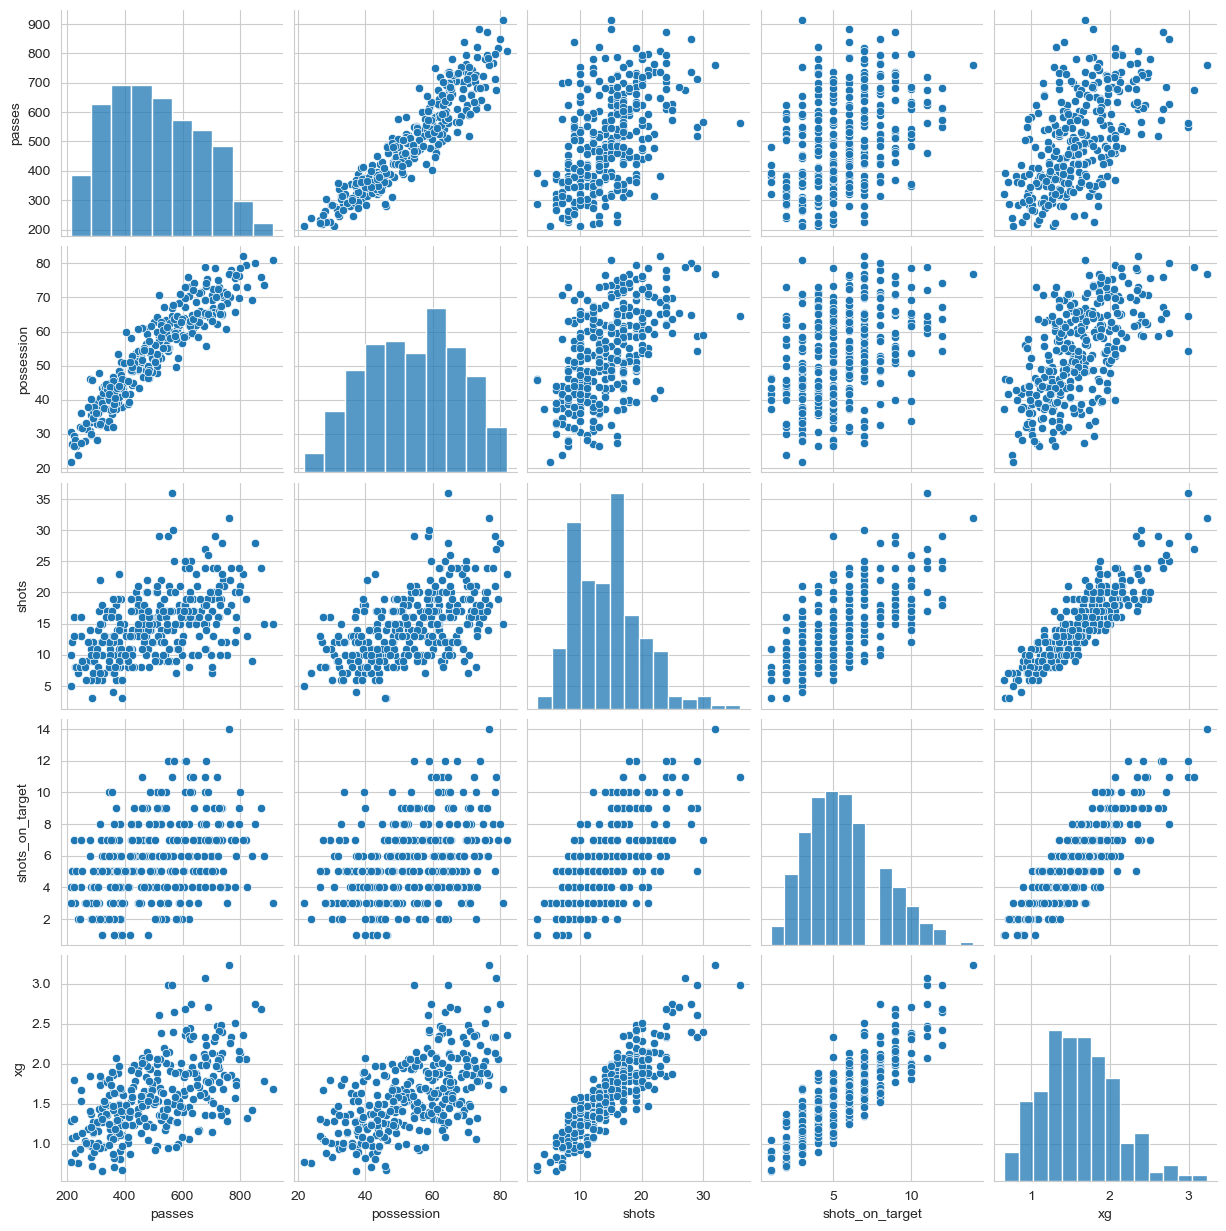

In [180]:
pairplot(winner_att)

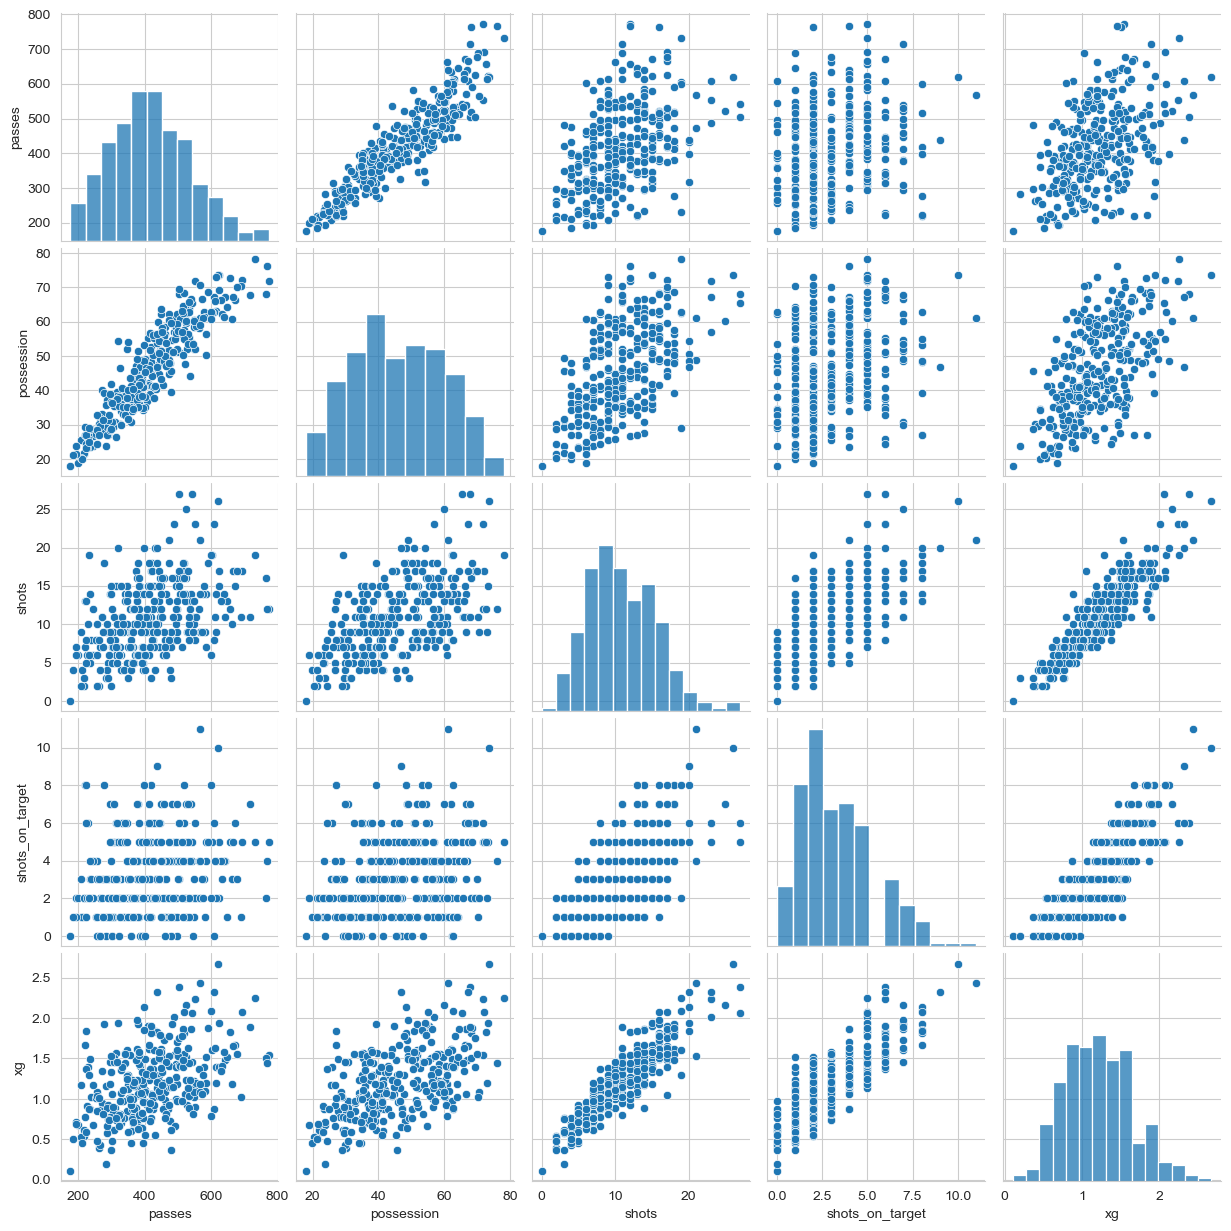

In [181]:
pairplot(loser_att)

In [191]:
def_stats = ['passes','possession','shots','shots_on_target','xg']
home_def_stats = ['away_'+i for i in def_stats[:-1]] + ['home_xg']
away_def_stats = ['home_'+i for i in def_stats[:-1]] + ['away_xg']


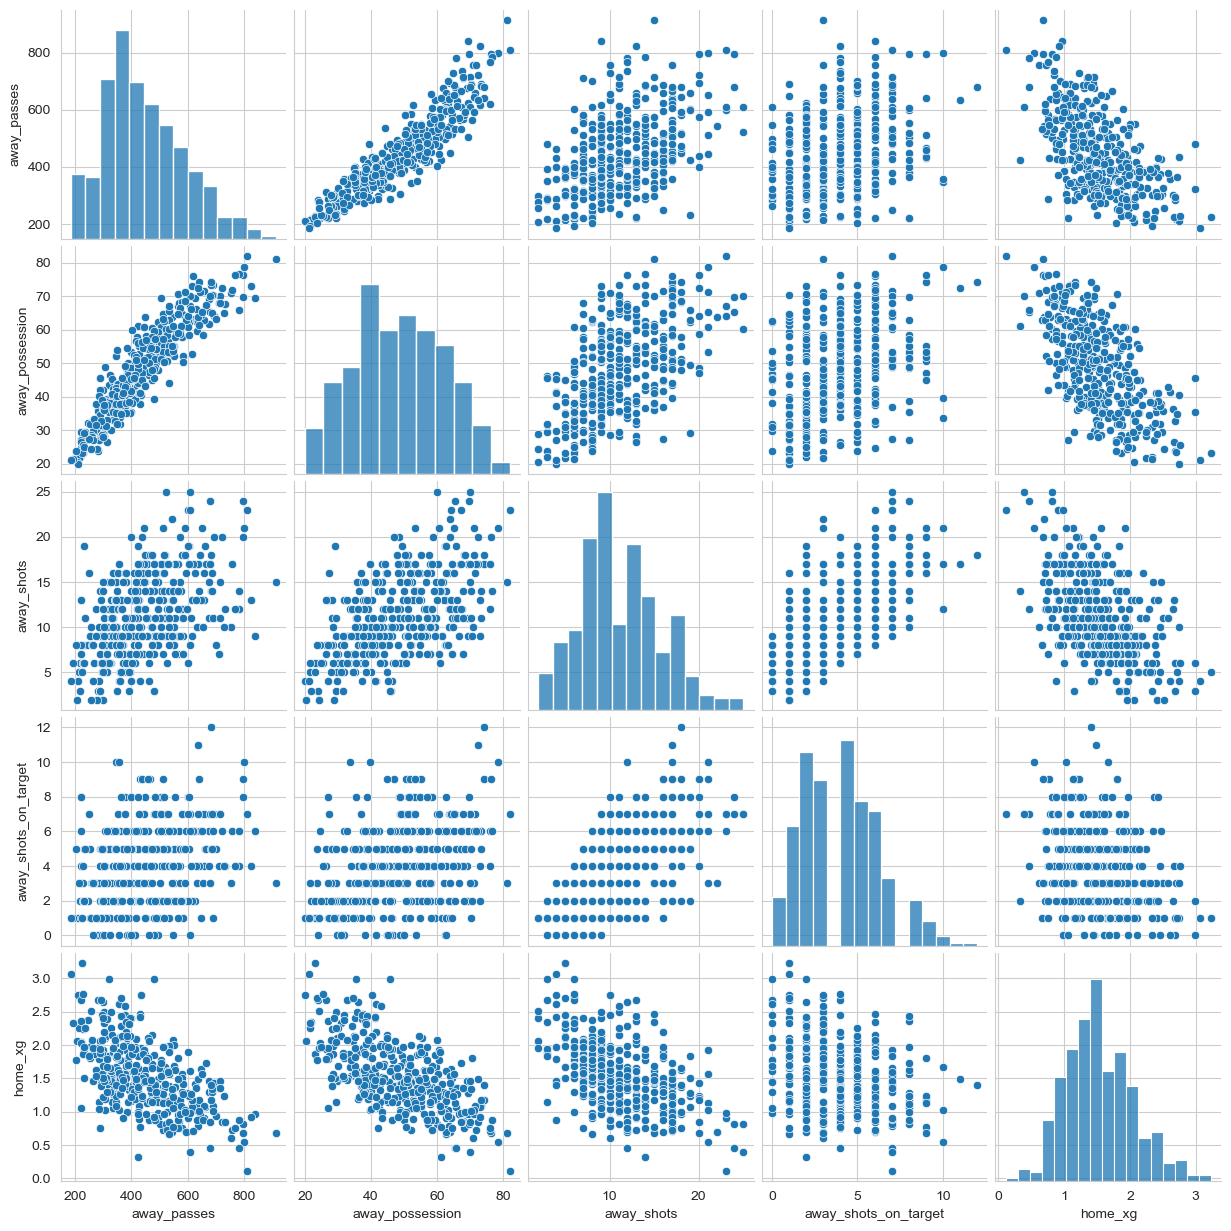

In [192]:
pairplot(data[home_def_stats])

In [22]:
cols_required = ['home_team_name',
 'away_team_name','home_team_goal_count',
 'away_team_goal_count','home_team_shots', 'away_team_shots', 'home_team_shots_on_target','away_team_shots_on_target','home_team_possession','away_team_possession','team_a_xg','team_b_xg'	]
epl = epl[cols_required]

In [24]:
epl['Winner'] = 'Home'
epl.loc[epl['home_team_goal_count'] < epl['away_team_goal_count'],['Winner']] = 'Away'
epl.loc[epl['home_team_goal_count'] == epl['away_team_goal_count'],['Winner']] = 'Draw'


In [29]:
epl['Home Efficiency'] = epl['home_team_goal_count'].values/epl['team_a_xg'].values
epl['Away Efficiency'] = epl['away_team_goal_count'].values/epl['team_b_xg'].values


In [28]:
epl.shape

(380, 13)

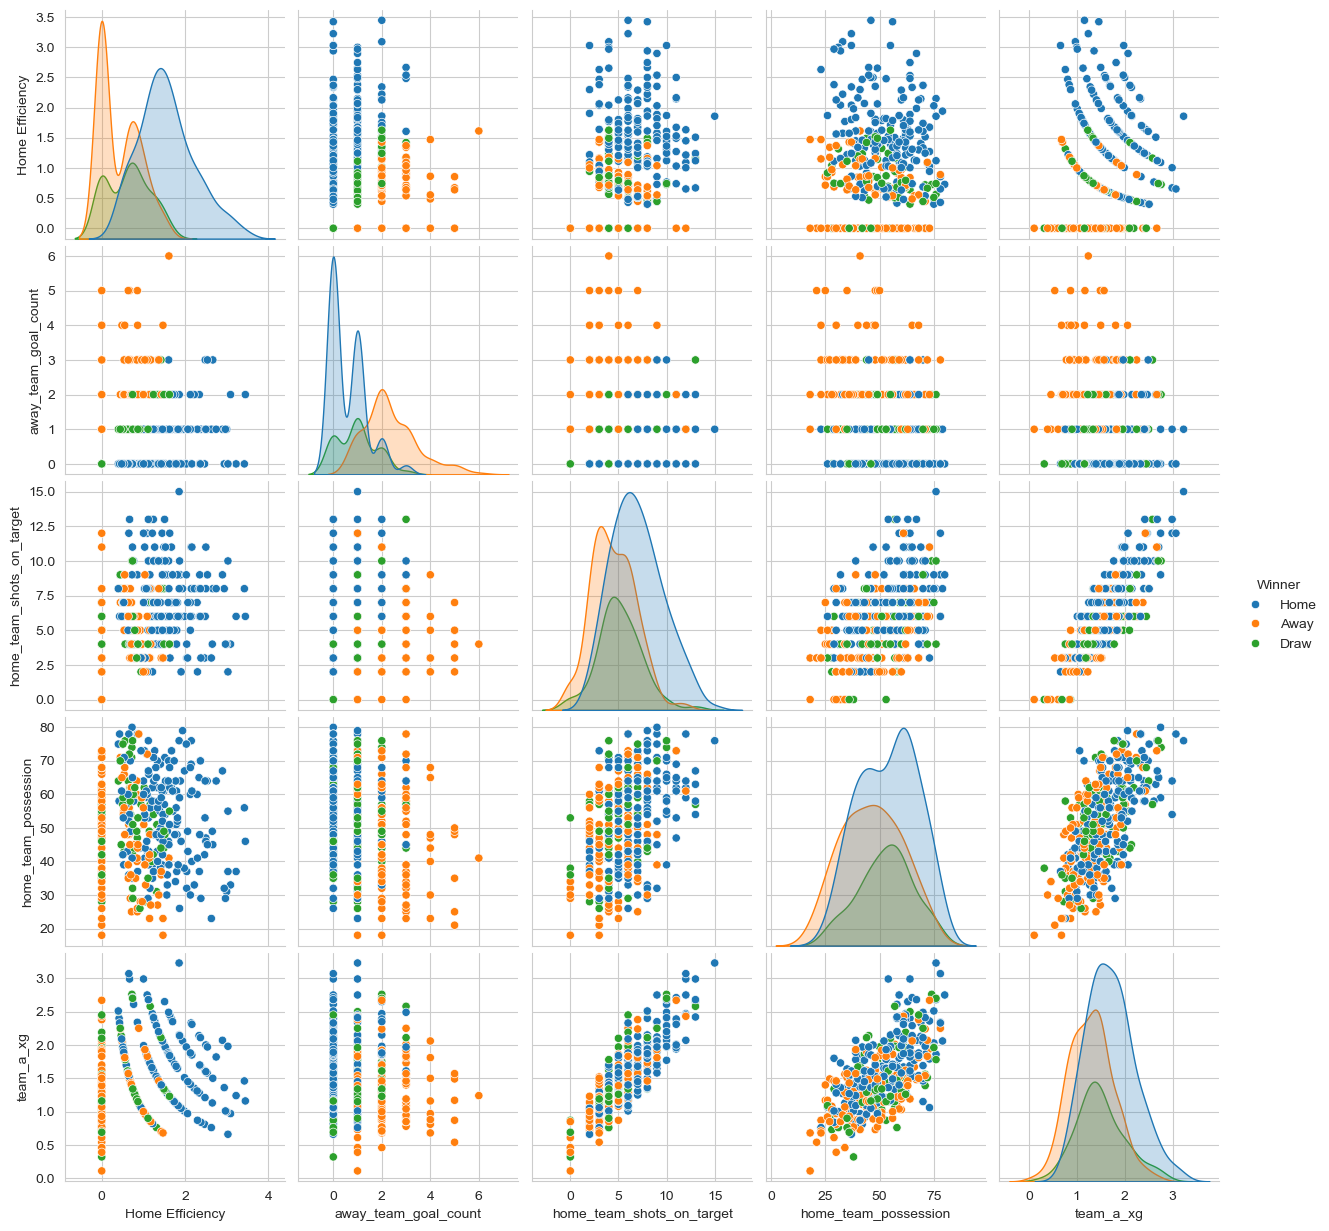

In [30]:
pairplot(epl[['Home Efficiency','away_team_goal_count','home_team_shots_on_target','home_team_possession','team_a_xg','Winner']],hue='Winner')